## 1. USING RANDOM DATA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

In [2]:
# Create random 2d data
mu = np.array([10,13])
sigma = np.array([[3.5, -1.8], [-1.8,3.5]])

print("Mu ", mu.shape)
print("Sigma ", sigma.shape)

# Create 1000 samples using mean and sigma
org_data = rnd.multivariate_normal(mu, sigma, size=(1000))
print("Data shape ", org_data.shape)

Mu  (2,)
Sigma  (2, 2)
Data shape  (1000, 2)


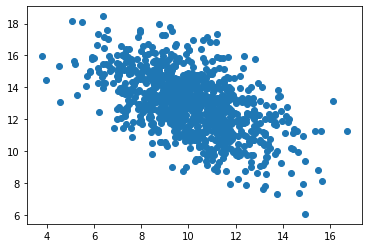

In [9]:
plt.scatter(org_data[:,0], org_data[:,1])

In [10]:
# Subtract mean from data
mean = np.mean(org_data, axis= 0)
print("Mean ", mean.shape)
mean_data = org_data - mean
print("Data after subtracting mean ", org_data.shape, "\n")

Mean  (2,)
Data after subtracting mean  (1000, 2) 



In [12]:
# Compute covariance matrix
cov = np.cov(mean_data.T)
cov = np.round(cov, 2)
print("Covariance matrix ", cov.shape, "\n")

Covariance matrix  (2, 2) 



In [13]:
# Perform eigen decomposition of covariance matrix
eig_val, eig_vec = np.linalg.eig(cov)
print("Eigen vectors ", eig_vec)
print("Eigen values ", eig_val, "\n")

Eigen vectors  [[ 0.7098492   0.70435368]
 [-0.70435368  0.7098492 ]]
Eigen values  [5.46505829 1.60494171] 



In [14]:
# Sort eigen values and corresponding eigen vectors in descending order
indices = np.arange(0,len(eig_val), 1)
indices = ([x for _,x in sorted(zip(eig_val, indices))])[::-1]
eig_val = eig_val[indices]
eig_vec = eig_vec[:,indices]
print("Sorted Eigen vectors ", eig_vec)
print("Sorted Eigen values ", eig_val, "\n")

Sorted Eigen vectors  [[ 0.7098492   0.70435368]
 [-0.70435368  0.7098492 ]]
Sorted Eigen values  [5.46505829 1.60494171] 



In [15]:
# Get explained variance
sum_eig_val = np.sum(eig_val)
explained_variance = eig_val/ sum_eig_val
print(explained_variance)
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)

[0.77299269 0.22700731]
[0.77299269 1.        ]


In [16]:
# Take transpose of eigen vectors with data
pca_data = np.dot(mean_data, eig_vec)
print("Transformed data ", pca_data.shape)

Transformed data  (1000, 2)


## 2. IRIS DATASET

In [27]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [25]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=['sepal length', 'sepal width' , 'petal lenght', 'petal width', 'target'])

In [26]:
df

,sepal length,sepal width,petal lenght,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [28]:
features = ['sepal length', 'sepal width', 'petal lenght', 'petal width']

x = df.loc[:, features].values

y = df.loc[:, ['target']].values

x = StandardScaler().fit_transform(x)

In [30]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [32]:
targetDataframe = df[['target']]

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)

In [33]:
newDataframe

,PC1,PC2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


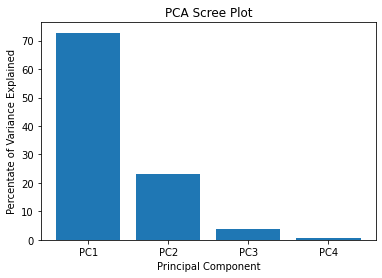

In [35]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)

percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4']
plt.bar(x= range(1,5), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

Text(0, 0.5, 'PC2')

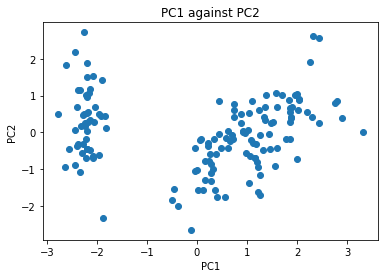

In [36]:
plt.scatter(principalDataframe.PC1, principalDataframe.PC2)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

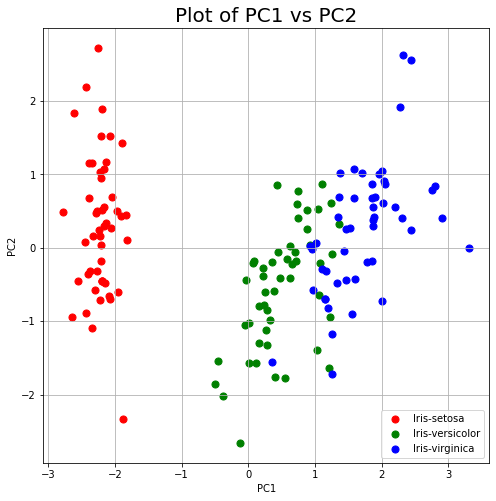

In [37]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Plot of PC1 vs PC2', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = newDataframe['target'] == target
    ax.scatter(newDataframe.loc[indicesToKeep, 'PC1']
               , newDataframe.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

In [38]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])